In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# First, obtain the data

In [2]:
import pathlib
import os

p = pathlib.Path('.')

os.makedirs(p/'large_files', exist_ok=True)

Using the content of the file `"batch_download_zips.py"` in the `"images/"` folder. Updated for python3 usage.

In [5]:
import urllib


# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
    'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
    'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
    'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
    'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
    'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
    'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
    'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]


for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading', fn, '...')
    # urllib.request.urlretrieve(link, p/'large_files'/fn)  # download the zip file
print("Download complete. Please check the checksums")

downloading images_01.tar.gz ...
downloading images_02.tar.gz ...
downloading images_03.tar.gz ...
downloading images_04.tar.gz ...
downloading images_05.tar.gz ...
downloading images_06.tar.gz ...
downloading images_07.tar.gz ...
downloading images_08.tar.gz ...
downloading images_09.tar.gz ...
downloading images_10.tar.gz ...
downloading images_11.tar.gz ...
downloading images_12.tar.gz ...
Download complete. Please check the checksums


In [6]:
image_dir = p/'large_files'/'images'

Go in you large_file folder with a terminal and extract tar.gz using 
`tar -xvzf images_XX.tar.gz` it should extract all images in `./large_files/images/`

On https://nihcc.app.box.com/v/ChestXray-NIHCC/folder/36938765345

Download the following files and upload them in `large_data` folder:
- BBox_List_2017.csv
- Data_Entry_2017.csv
- test_list.txt
- train_val_list.txt

# Data Analysis

In [7]:
ls = lambda x: list(x.iterdir())
count = lambda x : len(ls(x))

count(image_dir)

107121

In [8]:
read_txt = lambda fn : [line.rstrip() for line in open(p/"large_files"/fn)]

training = read_txt('train_val_list.txt')
testing  = read_txt('test_list.txt')

print('   - training - ')
print(len(training))
print(training[:10])
print('   - test     - ')
print(len(testing))
print(testing[:10])

   - training - 
86524
['00000001_000.png', '00000001_001.png', '00000001_002.png', '00000002_000.png', '00000004_000.png', '00000005_000.png', '00000005_001.png', '00000005_002.png', '00000005_003.png', '00000005_004.png']
   - test     - 
25596
['00000003_000.png', '00000003_001.png', '00000003_002.png', '00000003_003.png', '00000003_004.png', '00000003_005.png', '00000003_006.png', '00000003_007.png', '00000013_000.png', '00000013_001.png']


In [22]:
import pandas as pd

# de stands for "'Data_Entry_..."
de = pd.read_csv(p/'large_files'/'Data_Entry_2017.csv');


In [23]:
de.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [24]:
de.shape

(112120, 12)

In [26]:
de.shape[0] == count(image_dir)

False

Ok, missing data?

In [27]:
get_filenames_in_dir = lambda x : [str(i).split('/')[-1] for i in ls(x)]
dataset = get_filenames_in_dir(image_dir)

de = de[de['Image Index'].isin(dataset)]

In [28]:
de.shape

(107121, 12)

In [29]:
de.shape[0] == count(image_dir)

True

In [30]:
de.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
dtype: object

In [31]:
de.isnull().sum()

Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    107121
dtype: int64

In [32]:
bl = pd.read_csv(p/'large_files'/'BBox_List_2017.csv');

In [33]:
bl.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [34]:
bl.shape

(984, 9)

In [35]:
training[:10]

['00000001_000.png',
 '00000001_001.png',
 '00000001_002.png',
 '00000002_000.png',
 '00000004_000.png',
 '00000005_000.png',
 '00000005_001.png',
 '00000005_002.png',
 '00000005_003.png',
 '00000005_004.png']

In [36]:
tr_bl = bl[bl['Image Index'].isin(training)]
te_bl = bl[bl['Image Index'].isin(testing) ]

print(tr_bl.shape)
print(te_bl.shape)

(0, 9)
(984, 9)


No bounding box available in training set.

# Train / Test Split

In [37]:
train_df = de[de['Image Index'].isin(training)]
test_df  = de[de['Image Index'].isin(testing) ]

In [38]:
train_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
4999,00001336_000.png,No Finding,0,1336,16,M,PA,2048,2500,0.171,0.171,NaN
5000,00001337_000.png,No Finding,0,1337,53,F,PA,2992,2991,0.143,0.143,NaN
5001,00001338_000.png,No Finding,0,1338,60,M,PA,2992,2991,0.143,0.143,NaN
5002,00001338_001.png,No Finding,1,1338,61,M,AP,3056,2544,0.139,0.139,NaN
5003,00001338_002.png,Infiltration,2,1338,61,M,AP,3056,2544,0.139,0.139,NaN


In [39]:
train_df.shape

(82492, 12)

In [40]:
test_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
5087,00001369_000.png,Cardiomegaly,0,1369,35,F,PA,2048,2500,0.171,0.171,NaN
5096,00001373_000.png,No Finding,0,1373,53,M,AP,2500,2048,0.168,0.168,NaN
5097,00001373_001.png,Cardiomegaly,1,1373,54,M,AP,2500,2048,0.168,0.168,NaN
5098,00001373_002.png,Cardiomegaly|Infiltration,2,1373,54,M,AP,2500,2048,0.168,0.168,NaN
5099,00001373_003.png,No Finding,3,1373,55,M,AP,2500,2048,0.168,0.168,NaN


In [41]:
test_df.shape

(24629, 12)

In [46]:
if len(set(testing + training)) != (len(training) + len(testing)):
    print('Not good')
else:
    print('Good to go')

Good to go


# Quick Deep Learning experiment

In [43]:
from fastai.vision import *

## Train a model

In [44]:
src = (ImageItemList.from_df(train_df, path=image_dir, cols='Image Index')
        .random_split_by_pct(valid_pct=0.2, seed=777)
        .label_from_df(cols="Finding Labels", label_delim='|'))

In [45]:
data = (src.transform(None, size=64)
        .databunch().normalize(imagenet_stats))

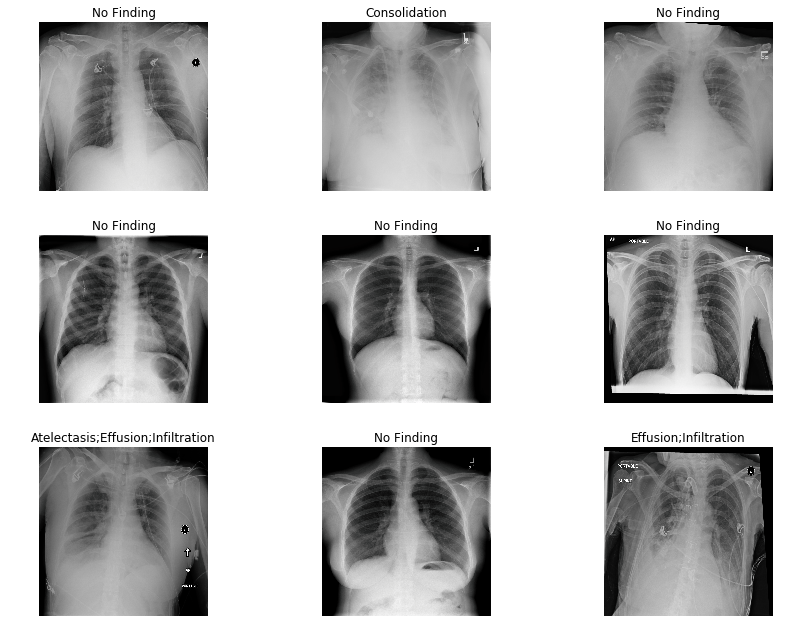

In [48]:
data.show_batch(rows=3, figsize=(12,9))

In [49]:
learn = create_cnn(data, arch=resnet34)

NameError: name 'resnet34' is not defined